In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation 
%matplotlib inline

# Mathematical Physics 1, Assignment 1

We start by setting up our acceleration function parameterized by `k` and `g` which are the two time scales in this model. The equation $F_d = m \gamma \dot{x}$ gives us acceleration as $a = \gamma \dot{x}$, which allows us to deduce the dimensions of $\gamma$ as $\left[ T^{-1} \right]$. Thus our total equation for the force becomes
$$
    m\ddot{x} = -kx - m \gamma \dot{x}
$$
And similarly acceleration becomes
$$
    \ddot{x} = -\frac{k}{m} x - \gamma \dot{x}
$$

If we assume $m$ to be 1 unit, say 1 kilogram, then our acceleration function becomes
$$
    \ddot{x} = -kx - \gamma \dot{x}
$$

We can see that we get a unique function of acceleration with the parameters for $k$ and $\gamma$

> *A note on design patterns* - I had initially decided to use the factory design pattern, as that reflects the fact that each acceleration function is parameterized uniquely by a $k$ and a $\gamma$. Thus, the function `factory_a` would accept a $k$ and $\gamma$ and would return an acceleration function with $x$ and $\dot x$ as independent variables, however for simplicity and readablitiy I decided to make the acceleration function parameterized by $k$, $\gamma$, $x$ and $\dot x$

In [3]:
# Configuration Parameters
k = 1
g = 1
frames = 30*10

In [4]:
def a(k, g, x, v):
    return -k*x -g*v

In [14]:
tf = 30
dt = 0.01

In [15]:
def spring_plot(k, g, tf, dt):
    x, v = np.array([]), np.array([])
    t = np.r_[[0],np.arange(dt/2, tf, dt)]

    x = np.append(x, 1)
    v = np.append(v, 1)

    for _t in t[:-1]:
        v = np.append( v, v[-1] + a(k, g, x[-1], v[-1]) * dt )
        x = np.append( x, x[-1] + v[-1] * dt )
    return x, v, t

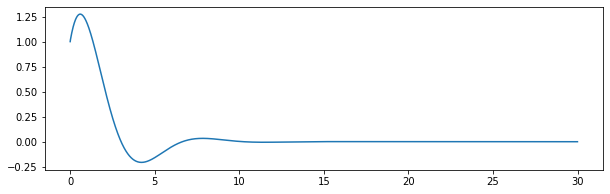

In [16]:
x, v, t = spring_plot(k, g, tf, dt)
simple_fig, simple_ax = plt.subplots()
simple_fig.set_size_inches(10, 3)
simple_ax.plot(t, x)
simple_fig.savefig('images/simple_spring.png')

The plot is the ideal simple harmonic oscilator, with $\gamma=1$

Now we let $\gamma$ range from $0$ to $2k$, and use the `FuncAnimation` function to animate the plot as the value of $\gamma$ increases. We also display the ration $\frac{\gamma}k$ in the legend

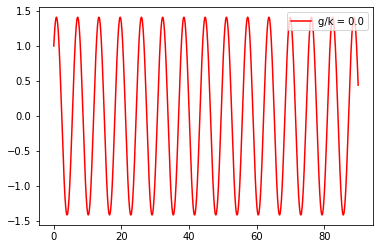

In [7]:
anim_fig, anim_ax = plt.subplots(nrows=1, ncols=1)
spring, = anim_ax.plot(t, x, 'r', label = 'g/k = {}'.format(g/k))
anim_legend = anim_ax.legend(loc='upper right')
g_range = np.linspace(0, 2*k, frames)

In [8]:
def update(i):
    g = g_range[i]
    x,v,t = spring_plot(1, g, tf, dt)
    spring.set_data(t, v)
    spring.set_label('g/k = {}'.format(g/k))
    anim_legend.remove()
    new_anim_legend = anim_ax.legend(loc='upper right')
    return spring,new_anim_legend

In [9]:
anim = FuncAnimation(anim_fig, update, interval=1000/30, frames=frames)

In [10]:
from IPython.display import HTML
HTML(anim.to_html5_video())

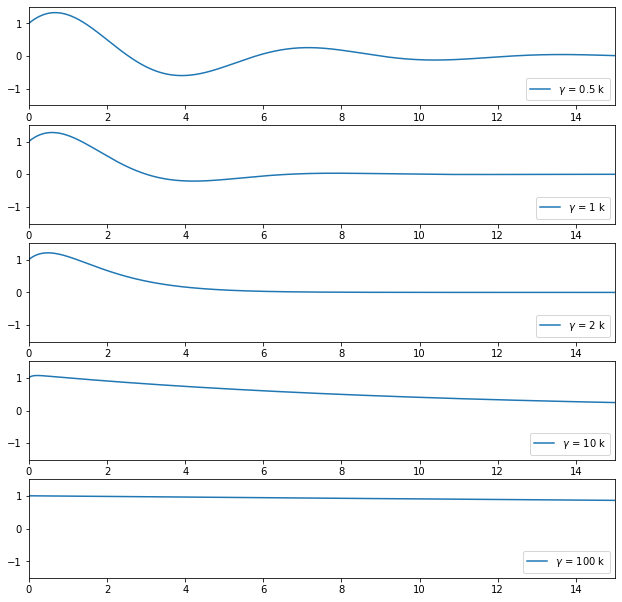

In [20]:
coeff = [0.5, 1, 2, 10, 100]
comparitive_fig, comparitive_ax = plt.subplots(nrows=5, ncols=1)
comparitive_fig.set_size_inches(10.5, 10.5)

for n in range(len(coeff)):
    x, v, t = spring_plot(k, coeff[n]*k, tf, dt)
    comparitive_ax[n].plot(t, x, label=r'$\gamma$ = {} k'.format(coeff[n]))
    
    comparitive_ax[n].legend(loc='lower right')
    comparitive_ax[n].set_ylim(-1.5, 1.5)
    comparitive_ax[n].set_xlim(0, 15)


comparitive_fig.savefig('images/comparitive_plot.png')

As we can see, as $\gamma$ increases, the oscillator behaves less and less like a simple harmonic oscillator and the oscillation damps out over time. Thus, $\gamma$ works functionally as a *dampening term*, which takes energy out of the system. We can say that $F_d = -m\gamma \dot x$ is an external dampening force, such as the viscous force of teh surrounding fluid